Assignment-5

Your main task for this assignment is to combine Linear Regression, Greedy Algorithm and PnL discussed in lecture to predict your trading results. You will be predicting Bitcoin price this time. You should refer to the ipynb file for this tutorial to get the structure. 

This time the prediction will be slightly different from the Lab. Every prediction should be a result from a model that is trained based on the previous 400 days. Example: if you are predicting 1-1-2019, the model should be trained using the previous 400 days, and so on.


The instruction to the assignment are as follow:

1. Read BTC price data
2. Only keep `close` column for analysis.
3. Create features that correspond to the time interval in which we want to predict
4. Drop all rows with missing value.
5. Set `fix_history_length` equal to 400, `fix_test_length` equal to 100
6. Use Greedy Algorithm instead of All Subset Selection
7. Find 50 different samples of Return using the given seed format
8. Use a histogram to summarize your result. Make sure to adjust the histogram settings to make it look nice

The total running time should be about 7 hours. Do not shut down your kernel during the computation.

In [60]:
#install packages
#pip3 install pandas

In [61]:
import pandas as pd
import numpy as np

In [62]:
pd.options.display.max_rows, pd.options.display.max_columns = 10, 25
BTC_price_origin = pd.read_csv('BTC-USD.csv')
BTC_price_origin

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-03-07,272.559998,278.250000,269.410004,274.910004,274.910004,16708000
1,2015-03-08,274.910004,278.779999,271.309998,274.489990,274.489990,13902830
2,2015-03-09,274.489990,293.260010,273.790009,290.019989,290.019989,43259194
3,2015-03-10,290.019989,300.959991,288.119995,291.369995,291.369995,46657647
4,2015-03-11,291.369995,297.660004,288.880005,295.600006,295.600006,23542829
...,...,...,...,...,...,...,...
1457,2019-03-03,3842.939941,3853.280029,3788.040039,3812.310059,3812.310059,64065044
1458,2019-03-04,3812.310059,3831.010010,3705.139893,3731.280029,3731.280029,147245676
1459,2019-03-05,3731.280029,3893.520020,3720.489990,3874.179932,3874.179932,165062256
1460,2019-03-06,3874.179932,3916.290039,3839.389893,3874.979980,3874.979980,129520549


In [63]:
BTC_price_origin.index = pd.to_datetime(BTC_price_origin['Date'].values, format='%Y-%m-%d')
stock = BTC_price_origin[['Close']].copy()
print(stock)
print(stock.index)

                  Close
2015-03-07   274.910004
2015-03-08   274.489990
2015-03-09   290.019989
2015-03-10   291.369995
2015-03-11   295.600006
...                 ...
2019-03-03  3812.310059
2019-03-04  3731.280029
2019-03-05  3874.179932
2019-03-06  3874.979980
2019-03-07  3882.610107

[1462 rows x 1 columns]
DatetimeIndex(['2015-03-07', '2015-03-08', '2015-03-09', '2015-03-10',
               '2015-03-11', '2015-03-12', '2015-03-13', '2015-03-14',
               '2015-03-15', '2015-03-16',
               ...
               '2019-02-26', '2019-02-27', '2019-02-28', '2019-03-01',
               '2019-03-02', '2019-03-03', '2019-03-04', '2019-03-05',
               '2019-03-06', '2019-03-07'],
              dtype='datetime64[ns]', length=1462, freq=None)


In [64]:
stock['Return'] = stock['Close'].diff()/stock['Close']
stock

,Close,Return
2015-03-07,274.910004,NaN
2015-03-08,274.489990,-0.001530
2015-03-09,290.019989,0.053548
2015-03-10,291.369995,0.004633
2015-03-11,295.600006,0.014310
...,...,...
2019-03-03,3812.310059,-0.008034
2019-03-04,3731.280029,-0.021716
2019-03-05,3874.179932,0.036885
2019-03-06,3874.979980,0.000206


In [65]:
predictor_variables = ['1D','3D','1W','2W','3W','1M','6W','2M','3M','4M','5M','6M','9M','1Y']

target = ['Return']

In [66]:
#calculate the predictor to corresponding no of days
vardict = { '1D': 1, '3D': 3,
            '1W': 5, '2W': 10, '3W': 15, '6W': 30,
            '1M': 20, '2M': 40, '3M': 60, '4M': 80, '5M': 100, '6M': 120, '9M': 180,
            '1Y': 250}

for var in predictor_variables:
    name = 'Return_' + var
    stock[name] = stock.Return.shift(vardict[var])

stock = stock.dropna()
stock

,Close,Return,Return_1D,Return_3D,Return_1W,Return_2W,Return_3W,Return_1M,Return_6W,Return_2M,Return_3M,Return_4M,Return_5M,Return_6M,Return_9M,Return_1Y
2015-11-13,333.769989,-0.000240,0.087285,-0.129288,-0.036414,0.093849,0.032172,0.019960,0.014069,-0.001049,-0.001218,0.041177,-0.009158,-0.024694,0.000296,-0.001530
2015-11-14,331.769989,-0.006028,-0.000240,-0.104952,0.022776,0.010976,0.041239,0.018412,0.008293,0.007579,-0.001656,0.019825,-0.013381,0.010836,-0.015732,0.053548
2015-11-15,317.450012,-0.045109,-0.006028,0.087285,-0.129288,-0.047531,-0.051022,-0.009504,0.032069,0.024336,-0.004068,-0.010057,-0.000396,-0.020325,-0.002672,0.004633
2015-11-16,330.209991,0.038642,-0.045109,-0.000240,-0.104952,-0.034856,0.036260,0.032275,0.024891,-0.013005,0.017704,0.038465,-0.074594,-0.003185,0.008292,0.014310
2015-11-17,333.910004,0.011081,0.038642,-0.006028,0.087285,0.039679,0.101119,0.029255,-0.030229,-0.001649,-0.002196,-0.013742,0.019972,0.016206,0.006033,-0.005955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-03,3812.310059,-0.008034,0.002982,-0.001922,-0.007237,-0.009400,0.006566,-0.020436,0.007944,0.008362,0.020414,-0.054606,0.005235,-0.002876,0.013543,-0.028244
2019-03-04,3731.280029,-0.021716,-0.008034,0.002117,0.003352,0.011671,0.014623,0.001678,0.013410,-0.008396,-0.032626,-0.021521,-0.126958,0.014030,-0.099154,0.008659
2019-03-05,3874.179932,0.036885,-0.021716,0.002982,-0.001922,0.039903,0.061763,-0.003200,-0.017121,0.007356,0.009860,-0.000919,0.037471,-0.005177,-0.029102,-0.046036
2019-03-06,3874.979980,0.000206,0.036885,-0.008034,0.002117,-0.100082,0.002974,-0.004779,-0.005357,-0.004362,-0.004843,0.007022,-0.058014,0.007096,-0.016164,0.053599


In [67]:
#pip install itertools

In [68]:
from itertools import combinations

def all_subsets(my_list):
    subs = []
    for i in range(1, len(my_list) + 1):
        subs += combinations(my_list, i)
    subset_List = []
    for i in subs:
        subset_List += [list(i)]
    return subset_List

features = stock.columns.values.tolist()[2:]
target = ['Return']

features_subs = all_subsets(features)

In [69]:
fix_history_length = 400
fix_test_length = 100
sample_size = 50
randomRange = len(stock) - fix_history_length - fix_test_length
randomRange

711

In [70]:
def greedy_algo(train_valid, target, proportion):
    
    # initialize a list to save features
    greedy_select = []
    
    profit_greedy_algo = np.array([])
    for i in range(len(features)):
        profit = np.array([])
        features_left = list(set(features) - set(greedy_select))

        for new in features_left:
            features_new = greedy_select + [new]
            train_valid_sub = train_valid[features_new + target]

            # CrossValidation, compute the profit and save it into profit_sub
            profit_sub = PnL(train_valid_sub, target, proportion)
            profit = np.append(profit, profit_sub)

        # pick the features that gives the largest profit
        # and add it into our features list
        # meanwhile, save the corresponding profit
        greedy_select += [features_left[profit.argmax()]]
        profit_greedy_algo = np.append(profit_greedy_algo, profit.max())
        
    return greedy_select[:(profit_greedy_algo.argmax()+1)]

In [71]:
from sklearn.model_selection import train_test_split
def computation(df):
    for i in range(1, len(df)):
        if df.iloc[i, 1] >= 0:
            df.iloc[i, 2] = df.iloc[i-1, 2] * (1 + df.iloc[i, 0])
        else:
            df.iloc[i, 2] = df.iloc[i-1, 2] * (1 - df.iloc[i, 0])
    return df

def PnL(data, target, proportion):
    train_sub, valid_sub = train_test_split(data, test_size = proportion, random_state = 0)

    # create a linear model
    X_train = train_sub.drop(target, axis = 1)
    Y_train = train_sub[target]
    X_valid = valid_sub.drop(target, axis = 1)
    Y_valid = valid_sub[target]

    model = linear_model.LinearRegression()
    model.fit(X_train, Y_train)
    Y_valid_fit = model.predict(X_valid)

    # a data frame for computing and saving long_short value
    long_short_df = pd.DataFrame({'Return': Y_valid.iloc[:,0].values,
                                  'Predicted Return': Y_valid_fit.reshape(1,-1)[0].tolist(),
                                  'Long-short value': np.zeros(len(valid_sub))},
                                 index = valid_sub.index)

    cols = ['Return', 'Predicted Return', 'Long-short value']
    long_short_df = long_short_df[cols]

    # give an initial point
    initial = pd.DataFrame(np.array([0,0,1]).reshape(-1,3),
                       columns = long_short_df.columns)

    # combine df and initial point
    long_short_df = pd.concat([initial, long_short_df]) 
    
    # compute long_short value
    long_short_df_final = computation(long_short_df)
    
    # return final long_short value of this period
    return long_short_df_final.iloc[-1,2]

In [72]:
%%time
from sklearn import linear_model
profit_final = np.array([])

# Think about why we need two loops here:
# The answer is that this time, we need to change the training data for each day, each sample
# In total, we have 50 samples
for j in range(sample_size):
    
    np.random.seed(j)

    for i in range(fix_test_length):  
        
        random_Num = np.random.randint(randomRange)
        BeginTime = random_Num
        timestamp = fix_history_length + random_Num
        EndTime = timestamp + fix_test_length

        train_valid = stock.iloc[BeginTime:timestamp, : ]
        test = stock.iloc[timestamp:EndTime, : ]

        feature_update = greedy_algo(train_valid, target, 0.2)

        X_cv = train_valid[feature_update]
        Y_cv = train_valid[target]

        X_test_cv = test[feature_update]
        Y_test_cv = test[target]

        model_cv = linear_model.LinearRegression()
        model_cv.fit(X_cv, Y_cv)

        Y_test_cv_fit = model_cv.predict(X_test_cv)

        long_short_df = pd.DataFrame({'Return': Y_test_cv.values.reshape(1,-1)[0].tolist(),
                                      'Predicted Return': Y_test_cv_fit.reshape(1,-1)[0].tolist(),
                                      'Long-short value': np.zeros(len(Y_test_cv))},
                                     index = Y_test_cv.index)

        cols = ['Return', 'Predicted Return', 'Long-short value']
        long_short_df = long_short_df[cols]

        initial = pd.DataFrame(np.array([0,0,1]).reshape(-1,3),
                               columns = long_short_df.columns)
        
        long_short_df = pd.concat([initial, long_short_df])
        long_short_df_final = computation(long_short_df)
    
    profit_final = np.append(profit_final,long_short_df_final.iloc[-1,2])

profit_final

CPU times: user 12h 21min 54s, sys: 3h 36min 59s, total: 15h 58min 53s
Wall time: 2h 40min 43s


array([0.36685107, 1.18038739, 1.06897017, 1.70985132, 0.89258145,
       0.63139541, 0.83342753, 0.80349318, 1.07493998, 1.27440642,
       0.75132336, 0.20840567, 1.1165358 , 0.67837267, 0.73029019,
       0.67510199, 1.40911642, 1.58130451, 0.97498131, 0.75639879,
       0.5210792 , 1.54293813, 0.90892501, 0.70720938, 0.95676926,
       1.94423005, 1.21718828, 1.46961674, 1.1499853 , 0.30594945,
       2.57311981, 0.70736841, 2.06166376, 1.35433106, 2.26691105,
       1.33915904, 1.24428714, 0.74942906, 0.72082447, 0.64962772,
       0.6237515 , 1.56156538, 0.70736841, 0.65002065, 1.48574398,
       0.98082516, 0.66375061, 1.02255006, 1.26165354, 0.65737444])

Text(0.3, 14, '100 test points')

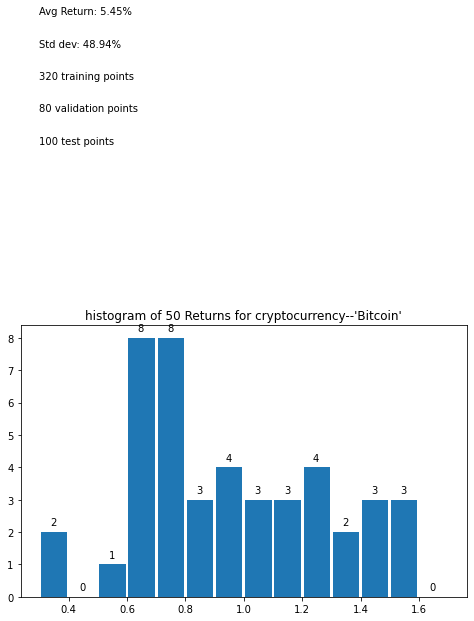

In [73]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,5))
bins = np.linspace(0.3, 1.7, 15)
a = plt.hist(profit_final, bins, histtype='bar', rwidth=0.9)
for i in range(len(bins)-1):
    plt.text(a[1][i]+0.037,a[0][i]+0.2,int(a[0][i]))
plt.title("histogram of 50 Returns for cryptocurrency--'Bitcoin'")

# you should change the coordinates of the plot to make it look nice
plt.text(0.3, 18, ("Avg Return: {0:.2f}%".format((profit_final.mean()-1) * 100)))
plt.text(0.3, 17, ("Std dev: {0:.2f}%".format(profit_final.std() * 100)))
plt.text(0.3, 16, "320 training points")
plt.text(0.3, 15, "80 validation points")
plt.text(0.3, 14, "100 test points")